In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
%matplotlib inline 

In [5]:
# read csv 
# Set file paths
hd_data = Path("HD.csv")
jnj_data = Path("JNJ.csv")
intc_data = Path("INTC.csv")
amd_data = Path("AMD.csv")
mu_data = Path("MU.csv")
nvda_data = Path("NVDA.csv")
tsm_data = Path("TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()

,INTC
date,
5/14/19,45.17
5/13/19,44.76
5/10/19,46.20
5/9/19,46.62
5/8/19,49.24


In [11]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_stocks = pd.concat([hd, jnj, intc, amd, mu, nvda, tsm], axis = 'columns', join = 'inner')
combined_stocks.head(5)
# daily returns! not just stock price 
combined_stocks_returns = combined_stocks.pct_change()
combined_stocks_returns.head()

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
5/14/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/13/19,-0.006680,-0.007167,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
5/10/19,0.022276,0.010979,0.032172,0.065549,0.041734,0.065447,0.044889
5/9/19,0.000000,-0.017554,0.009091,-0.026824,0.008475,0.008115,0.009806
5/8/19,0.003032,-0.000303,0.056199,-0.004410,0.012223,0.021917,0.010405


In [12]:
corr1 = combined_stocks_returns.corr()
corr1

,HD,JNJ,INTC,AMD,MU,NVDA,TSM
HD,1.000000,0.329386,0.429047,0.294653,0.375932,0.360918,0.393293
JNJ,0.329386,1.000000,0.318188,0.254498,0.337060,0.257717,0.317493
INTC,0.429047,0.318188,1.000000,0.385877,0.511066,0.483262,0.500741
AMD,0.294653,0.254498,0.385877,1.000000,0.438329,0.471212,0.352482
MU,0.375932,0.337060,0.511066,0.438329,1.000000,0.517198,0.477247
NVDA,0.360918,0.257717,0.483262,0.471212,0.517198,1.000000,0.472496
TSM,0.393293,0.317493,0.500741,0.352482,0.477247,0.472496,1.000000


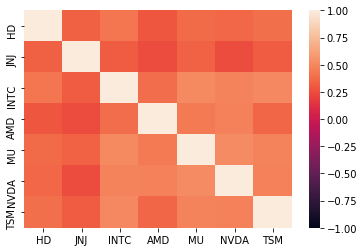

In [13]:
sns.heatmap(corr1, vmin=-1, vmax=1)

In [19]:
nflx_path = Path('nflx.csv')
nflx = pd.read_csv(nflx_path, parse_dates=True, index_col="date", infer_datetime_format=True)
nflx.sort_index(inplace=True, ascending=False)
nflx.head(5)


,close
date,
2019-05-16,359.31
2019-05-15,354.99
2019-05-14,345.61
2019-05-13,345.26
2019-05-10,361.04


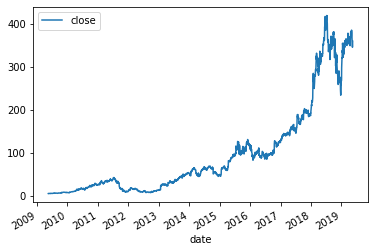

In [20]:
# Plot DataFrame
nflx.plot()

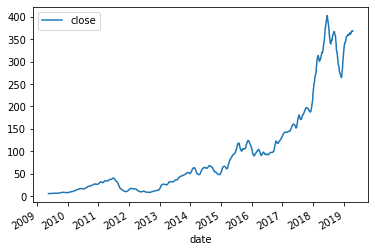

In [23]:
# Calculate 20-day Simple Moving Average for NFLX Closing Prices
nflx.rolling(window=20).mean().plot()

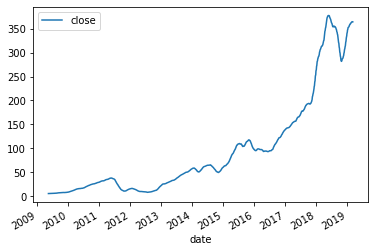

In [24]:
# Calculate 50-day Simple Moving Average for NFLX Closing Prices
nflx.rolling(window=50).mean().plot()

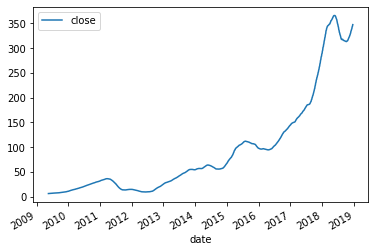

In [25]:
# Calculate 100-day Simple Moving Average for NFLX Closing Prices
nflx.rolling(window=100).mean().plot()

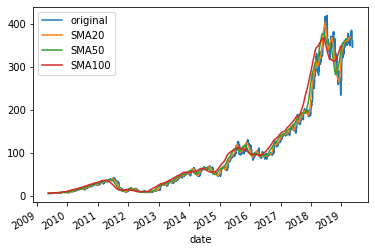

In [26]:
# Set figure of the daily closing prices of NFLX
ax = nflx.plot()

# Overlay SMA20, SMA50, and SMA100 on the same figure
nflx.rolling(window=20).mean().plot(ax=ax)
nflx.rolling(window=50).mean().plot(ax=ax)
nflx.rolling(window=100).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(['original', 'SMA20', 'SMA50', 'SMA100']);

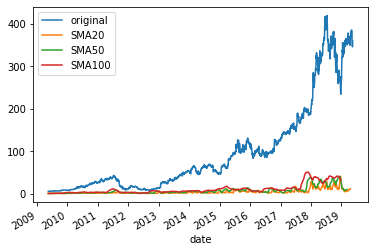

In [31]:
# Set figure of the daily closing prices of NFLX
ax2 = nflx.plot()

# Overlay STD20, STD50, and STD100 on the same figure
nflx.rolling(window=20).std().plot(ax=ax2)
nflx.rolling(window=50).std().plot(ax=ax2)
nflx.rolling(window=100).std().plot(ax=ax2)

# Set the legend of the figure
ax2.legend(['original', 'SMA20', 'SMA50', 'SMA100']);

In [14]:
btwtr_path = Path('twtr_data.csv')
bsp_path = Path('sp500_data.csv')
bsnap_path = Path('snap_data.csv')
bfb_path = Path('fb_data.csv')

btwtr = pd.read_csv(btwtr_path, parse_dates=True, index_col="date", infer_datetime_format=True)
bsp = pd.read_csv(bsp_path, parse_dates=True, index_col="date", infer_datetime_format=True)
bsnap = pd.read_csv(bsnap_path, parse_dates=True, index_col="date", infer_datetime_format=True)
bfb = pd.read_csv(bfb_path, parse_dates=True, index_col="date", infer_datetime_format=True)

bdata = pd.concat([bsp, btwtr, bsnap, bfb],axis='columns', join='inner')
bdata.columns = ['SP500','TWTR', 'SNAP', 'FB']
bdata.sort_index(inplace=True)
bdata.head(5)

,SP500,TWTR,SNAP,FB
date,,,,
2017-03-02,2381.919922,15.79,24.48,136.76
2017-03-03,2383.120117,15.75,27.09,137.17
2017-03-06,2375.310059,15.56,23.77,137.42
2017-03-07,2368.389893,15.18,21.44,137.30
2017-03-08,2362.979980,15.24,22.81,137.72


In [15]:
breturns = bdata.pct_change()
breturns.head()

,SP500,TWTR,SNAP,FB
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.000504,-0.002533,0.106618,0.002998
2017-03-06,-0.003277,-0.012063,-0.122554,0.001823
2017-03-07,-0.002913,-0.024422,-0.098023,-0.000873
2017-03-08,-0.002284,0.003953,0.063899,0.003059


In [16]:
# Calculate the overall covariances of each stock's daily returns to that of the S&P 500. Calculate the overall variance of S&P 500 daily returns.
cov_twtr = breturns['TWTR'].cov(breturns['SP500'])
cov_snap = breturns['SNAP'].cov(breturns['SP500'])
cov_fb = breturns['FB'].cov(breturns['SP500'])
var_sp = breturns['SP500'].var()

beta_twtr = cov_twtr / var_sp
beta_snap = cov_snap / var_sp
beta_fb = cov_fb / var_sp

print(beta_twtr, beta_snap, beta_fb)


1.509751599647906 1.1097434117740563 1.2815248952670966


In [19]:
# Calculate the rolling 30-day covariances of each stock's daily returns to that of the S&P 500. Calculate the rolling 30-day variance of S&P 500 daily returns.

cov_twtr30 = breturns['TWTR'].rolling(window=30).cov(breturns['SP500'])


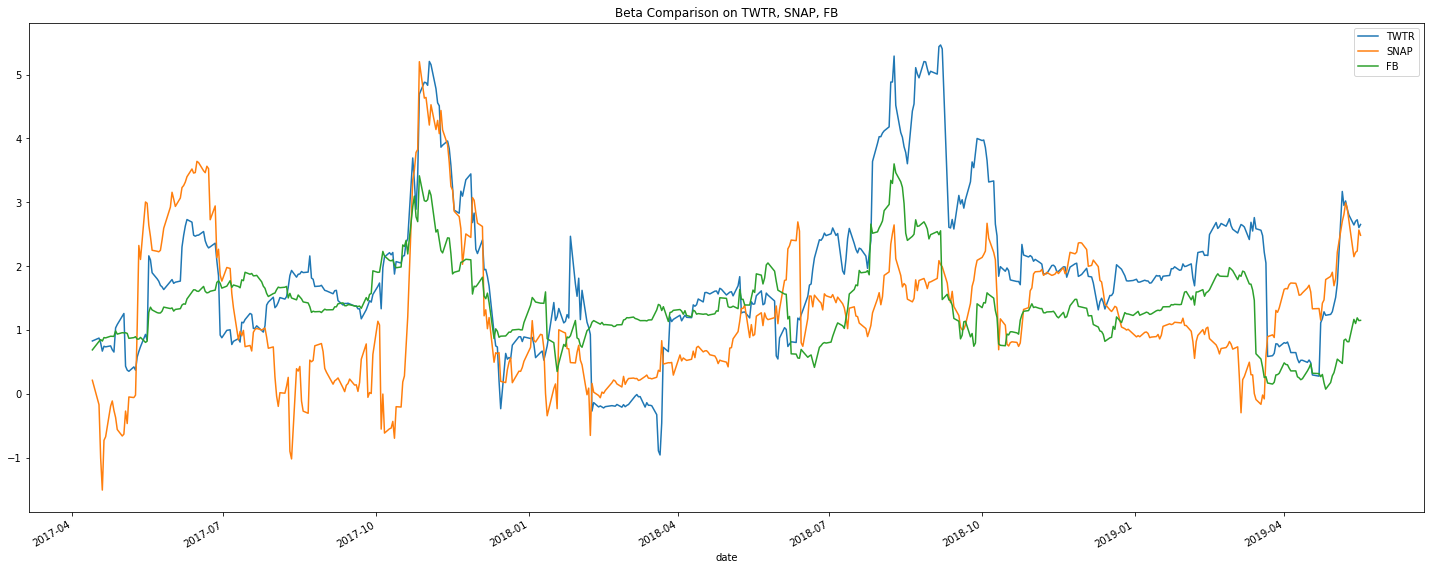

In [21]:
# continue
cov_snap30 = breturns['SNAP'].rolling(window=30).cov(breturns['SP500'])
cov_fb30 = breturns['FB'].rolling(window=30).cov(breturns['SP500'])
var_sp30 = breturns['SP500'].rolling(window=30).var()

beta_twtr30 = cov_twtr30 / var_sp30
beta_snap30 = cov_snap30 / var_sp30
beta_fb30 = cov_fb30 / var_sp30

axb = beta_twtr30.plot(figsize=(25,10), title='Beta Comparison on TWTR, SNAP, FB')
beta_snap30.plot(ax=axb)
beta_fb30.plot(ax=axb)
axb.legend(['TWTR', 'SNAP', 'FB']);

In [2]:
# PORTFOLIO PLANNER

bd_ppath = Path('bk_data.csv')
fang_ppath = Path('fang_data.csv')
jnj_ppath = Path('jnj_data.csv')
luv_ppath = Path('luv_data.csv')
mu_ppath = Path('mu_data.csv')
nke_ppath = Path('nke_data.csv')
sbux_ppath = Path('sbux_data.csv')
t_ppath = Path('t_data.csv')
wdc_ppath = Path('wdc_data.csv')
wrk_ppath = Path('wrk_data.csv')

bd = pd.read_csv(bd_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
fang = pd.read_csv(fang_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
jnj = pd.read_csv(jnj_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
luv = pd.read_csv(luv_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
mu = pd.read_csv(mu_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
nke = pd.read_csv(nke_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
sbux = pd.read_csv(sbux_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
t = pd.read_csv(t_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
wdc = pd.read_csv(wdc_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)
wrk = pd.read_csv(wrk_ppath, parse_dates=True, index_col="date", infer_datetime_format=True)

df = pd.concat([bd, fang, jnj, luv, mu, nke, sbux, t, wdc, wrk], axis='columns', join='inner')
df.columns = ['BD', 'FANG', 'JNJ', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']
df.sort_index(inplace=True)
df.head(5)


,BD,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


In [4]:
df_returns = df.pct_change()
df_returns.head(5)

vol = df_returns.std() * np.sqrt(252)
vol.sort_values(inplace=True)
vol

T       0.187579
SBUX    0.206805
BD      0.224967
NKE     0.246045
LUV     0.280021
WRK     0.303601
FANG    0.370840
JNJ     0.370840
WDC     0.415605
MU      0.479955
dtype: float64

In [5]:
df_returns.drop(columns = ['MU', 'WDC', 'JNJ', 'FANG', 'WRK'], inplace=True)
df_returns.head(5)

,BD,LUV,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,0.004076,-0.009414,0.006703,0.011179
2015-06-26,0.003034,-0.004929,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.033217,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002712,0.003251,0.001214,-0.006989


In [9]:
# Set portfolio weights of 0.5, 0.2, 0.15, 0.10, and 0.05 to the remaining stocks (from least risk to most risk).
ws = [0.5, 0.2, 0.15, 0.10, 0.05]
port_returns = df_returns.dot(ws)
port_returns.head(5)

cum_returns = (1 + port_returns).cumprod()
cum_returns.head(5)

date
2015-06-24         NaN
2015-06-25    0.995550
2015-06-26    1.003381
2015-06-29    0.977575
2015-06-30    0.979404
dtype: float64

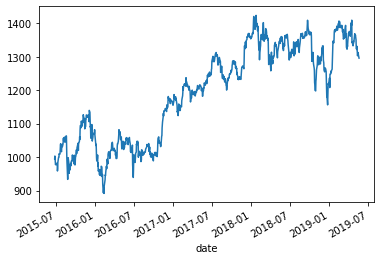

In [10]:
init_inv = 1000
cum_profit = init_inv * cum_returns
cum_profit.plot()


In [11]:
# portfolio returns
port_returns

date
2015-06-24         NaN
2015-06-25   -0.004450
2015-06-26    0.007866
2015-06-29   -0.025720
2015-06-30    0.001871
                ...   
2019-05-14    0.004491
2019-05-15   -0.002149
2019-05-16    0.005093
2019-05-17   -0.005460
2019-05-20   -0.007363
Length: 983, dtype: float64

In [12]:
# cumulative returns
cum_returns

date
2015-06-24         NaN
2015-06-25    0.995550
2015-06-26    1.003381
2015-06-29    0.977575
2015-06-30    0.979404
                ...   
2019-05-14    1.309233
2019-05-15    1.306420
2019-05-16    1.313074
2019-05-17    1.305905
2019-05-20    1.296290
Length: 983, dtype: float64